In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

/Users/tamerhousseinhag/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [19]:
tickers=['AAPL','TSLA','F','AMZN']
mydata=pd.DataFrame()
for t in tickers:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='2011-01-01')['Adj Close']

In [20]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2354 entries, 2011-01-03 to 2020-05-11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2354 non-null   float64
 1   TSLA    2354 non-null   float64
 2   F       2354 non-null   float64
 3   AMZN    2354 non-null   float64
dtypes: float64(4)
memory usage: 92.0 KB


In [21]:
mydata.head()

,AAPL,TSLA,F,AMZN
Date,,,,
2011-01-03,40.758278,26.620001,12.124990,184.220001
2011-01-04,40.970993,26.670000,12.216361,185.009995
2011-01-05,41.306126,26.830000,12.574843,187.419998
2011-01-06,41.272743,27.879999,12.806797,185.860001
2011-01-07,41.568314,28.240000,12.841943,185.490005


In [22]:
mydata.tail()

,AAPL,TSLA,F,AMZN
Date,,,,
2020-05-05,296.756683,768.210022,4.97,2317.800049
2020-05-06,299.818390,782.580017,4.87,2351.260010
2020-05-07,302.919983,780.039978,4.87,2367.610107
2020-05-08,310.130005,819.419983,5.24,2379.610107
2020-05-11,313.510010,815.539978,5.15,2406.379883


In [23]:
mydata.iloc[0]

AAPL     40.758278
TSLA     26.620001
F        12.124990
AMZN    184.220001
Name: 2011-01-03 00:00:00, dtype: float64

In [31]:
mydata.loc['2011-01-03']

AAPL     40.758278
TSLA     26.620001
F        12.124990
AMZN    184.220001
Name: 2011-01-03 00:00:00, dtype: float64

In [28]:
mydata_normalized=(mydata/mydata.iloc[0])*100

In [35]:
mydata_normalized

,AAPL,TSLA,F,AMZN
Date,,,,
2011-01-03,100.000000,100.000000,100.000000,100.000000
2011-01-04,100.521894,100.187826,100.753572,100.428831
2011-01-05,101.344139,100.788877,103.710130,101.737052
2011-01-06,101.262235,104.733277,105.623151,100.890240
2011-01-07,101.987414,106.085646,105.913014,100.689395
...,...,...,...,...
2020-05-05,728.089357,2885.837708,40.989721,1258.169598
2020-05-06,735.601221,2939.819656,40.164979,1276.332643
2020-05-07,743.210947,2930.277812,40.164979,1285.207953


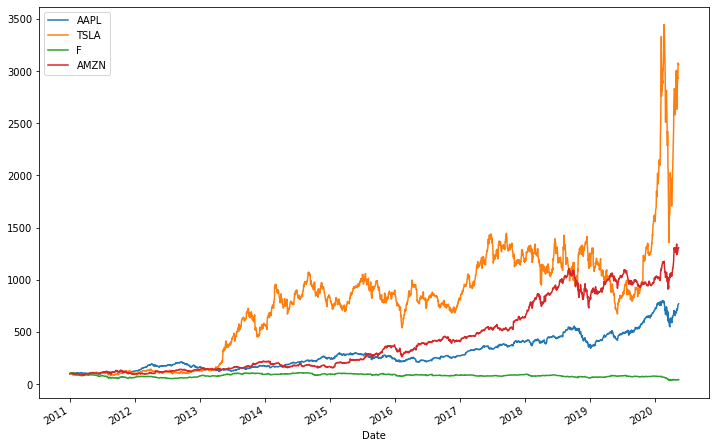

In [29]:
(mydata_normalized).plot(figsize=(12,8));

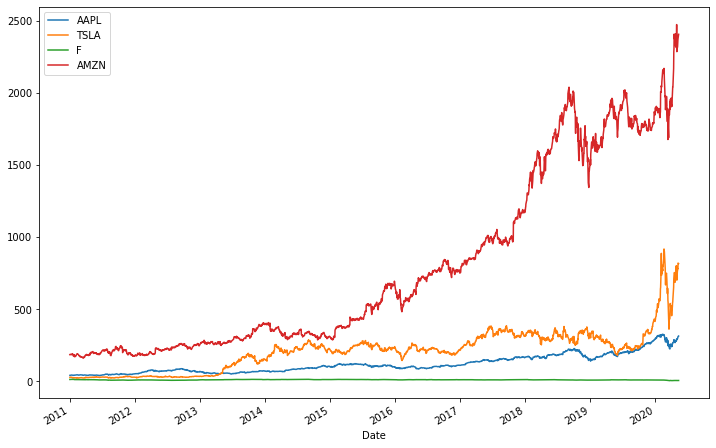

In [30]:
(mydata).plot(figsize=(12,8));

In [55]:
# Calculating the Return

returns=(mydata/mydata.shift(1))-1
returns.head()

,AAPL,TSLA,F,AMZN
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.005219,0.001878,0.007536,0.004288
2011-01-05,0.008180,0.005999,0.029344,0.013026
2011-01-06,-0.000808,0.039135,0.018446,-0.008324
2011-01-07,0.007161,0.012913,0.002744,-0.001991


In [56]:
weights=np.array([0.25,0.25,0.25,0.25])

In [58]:
np.dot(returns,weights)

array([           nan, 4.73031006e-03, 1.41374469e-02, ...,
       3.51323535e-03, 3.88325189e-02, 5.94361831e-05])

In [59]:
returns_d=returns.mean()
returns_d

AAPL    0.001020
TSLA    0.002022
F      -0.000191
AMZN    0.001288
dtype: float64

In [60]:
returns_an=(returns.mean())*250
returns_an

AAPL    0.255065
TSLA    0.505506
F      -0.047831
AMZN    0.322004
dtype: float64

In [61]:
np.dot(returns_an,weights)

0.25868605633535036

In [65]:
#portfolio_1=str(round(np.dot(returns_an,weights),5)*100) + '%'
#print(portfolio_1)

print(format(np.dot(returns_an,weights),'.2%'))

25.87%


In [69]:
weights_2=np.array([0.4,0.4,0.15,0.05])

In [79]:
mat_2=np.dot(returns,weights_2)
mat_2

array([       nan, 0.00418366, 0.01072458, ..., 0.00318736, 0.04136426,
       0.0004516 ])

In [80]:
returns_d2=returns.mean()
returns_d2

AAPL    0.001020
TSLA    0.002022
F      -0.000191
AMZN    0.001288
dtype: float64

In [81]:
returns_an2=(returns.mean())*250
returns_an2

AAPL    0.255065
TSLA    0.505506
F      -0.047831
AMZN    0.322004
dtype: float64

In [82]:
np.dot(returns_an,weights_2)

0.3131539280981756

In [83]:
print(format(np.dot(returns_an,weights_2),'.2%'))

31.32%
